In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

<h3> Load Dataset </h3>

The Federal Reserve Economic Database (FRED) provides historical daily exchange rates of all major currencies in the world.

In [2]:
df = pd.read_csv('datasets/fred_fxrates.csv')
mask = (df['Date'] >= '1999-01-04') & (df['Date'] <= '2013-09-27')
df = df.loc[mask]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
fxrates = df[["DEXCHUS", "DEXJPUS", "DEXKOUS", "DEXMAUS", "DEXUSEU", "DEXUSUK", "DEXTHUS", "DEXSZUS"]]

print(fxrates.shape)

(3709, 8)


In [3]:
fxrates.head() 

,DEXCHUS,DEXJPUS,DEXKOUS,DEXMAUS,DEXUSEU,DEXUSUK,DEXTHUS,DEXSZUS
Date,,,,,,,,
1999-01-04,8.2793,112.15,1187.5,3.8,1.1812,1.6581,36.20,1.3666
1999-01-05,8.2795,111.15,1166.0,3.8,1.1760,1.6566,36.18,1.3694
1999-01-06,8.2795,112.78,1160.0,3.8,1.1636,1.6547,36.50,1.3852
1999-01-07,8.2798,111.69,1151.0,3.8,1.1672,1.6495,36.30,1.3863
1999-01-08,8.2796,111.52,1174.0,3.8,1.1554,1.6405,36.45,1.3970


In [4]:
fxrates.tail() 

,DEXCHUS,DEXJPUS,DEXKOUS,DEXMAUS,DEXUSEU,DEXUSUK,DEXTHUS,DEXSZUS
Date,,,,,,,,
2013-09-23,6.1201,98.76,1073.90,3.1990,1.3520,1.6066,31.18,0.9100
2013-09-24,6.1208,98.76,1074.35,3.2150,1.3490,1.6006,31.27,0.9114
2013-09-25,6.1190,98.62,1076.42,3.2210,1.3536,1.6080,31.22,0.9082
2013-09-26,6.1194,98.95,1075.20,3.2145,1.3484,1.6012,31.16,0.9105
2013-09-27,6.1179,98.30,1074.38,3.2260,1.3537,1.6135,31.28,0.9050


<h3> Symbols & Its Units Details </h3>

In [5]:
symbols = ["DEXCHUS", "DEXJPUS", "DEXKOUS", "DEXMAUS", "DEXUSEU", "DEXUSUK", "DEXTHUS", "DEXSZUS"]
fxUnits = ["Chinese Yuan to 1 U.S. $", "Japanese Yen to 1 U.S. $", "South Korean Won to 1 U.S. $", 
           "Malaysian Ringgit to 1 U.S. $", "U.S. $ to 1 Euro", "U.S. $ to 1 British Pound", 
           "Thai Baht to 1 U.S. $", "Swiss Francs to 1 U.S. $"] 
df = pd.DataFrame(columns=["Symbols","fxUnits"])
df["Symbols"] = symbols
df["fxUnits"] = fxUnits
display(df)

,Symbols,fxUnits
0,DEXCHUS,Chinese Yuan to 1 U.S. $
1,DEXJPUS,Japanese Yen to 1 U.S. $
2,DEXKOUS,South Korean Won to 1 U.S. $
3,DEXMAUS,Malaysian Ringgit to 1 U.S. $
4,DEXUSEU,U.S. $ to 1 Euro
5,DEXUSUK,U.S. $ to 1 British Pound
6,DEXTHUS,Thai Baht to 1 U.S. $
7,DEXSZUS,Swiss Francs to 1 U.S. $


<h3> DEXUSEU Log Returns </h3>

In [6]:
fx_USEU_log_returns = np.log(fxrates['DEXUSEU'] / fxrates['DEXUSEU'].shift(1)).dropna()*100
print(fx_USEU_log_returns.head())

Date
1999-01-05   -0.441202
1999-01-06   -1.060020
1999-01-07    0.308907
1999-01-08   -1.016111
1999-01-11   -0.173250
Name: DEXUSEU, dtype: float64


<h3> Plot DEXUSEU Exchange Rates & Returns </h3>

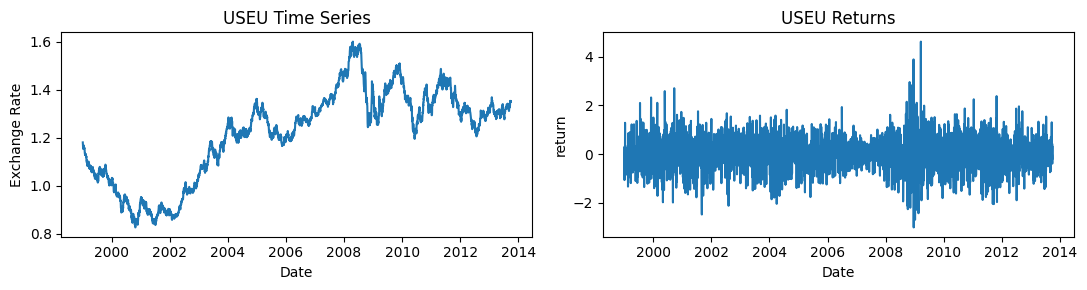

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

# Plot 'USEU' 
axes[0].plot(fxrates['DEXUSEU'])
axes[0].set_title('USEU Time Series')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Exchange Rate')

# Plot 'USEU' returns
axes[1].plot(fx_USEU_log_returns)
axes[1].set_title('USEU Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('return')

plt.tight_layout()
plt.show() 

<h3> Plot ACF & PACF </h3>

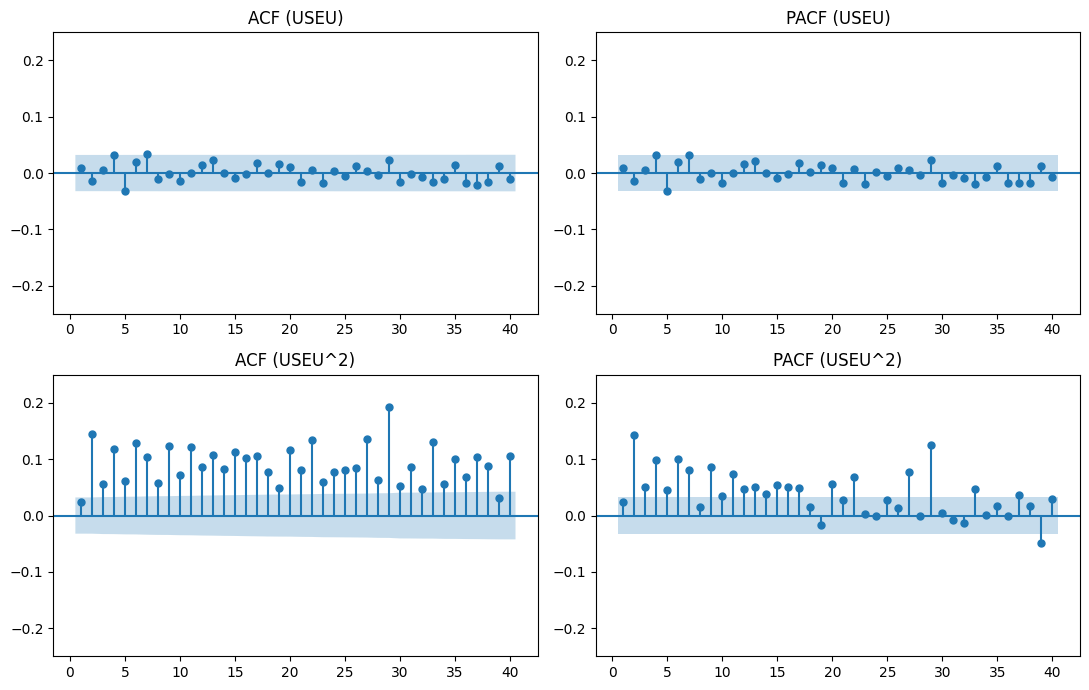

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(11, 7))

# Plot ACF of 'USEU'
plot_acf(fx_USEU_log_returns, lags=40, ax=axes[0,0], zero=False, title="ACF (USEU)")
axes[0,0].set_ylim(-0.25, 0.25)

# Plot PACF of 'USEU'
plot_pacf(fx_USEU_log_returns, lags=40, ax=axes[0,1],zero=False, title="PACF (USEU)")
axes[0,1].set_ylim(-0.25, 0.25)

# Plot ACF of 'USEU^2'
plot_acf(fx_USEU_log_returns**2, lags=40, ax=axes[1,0],zero=False, title="ACF (USEU^2)")
axes[1,0].set_ylim(-0.25, 0.25)

# Plot PACF of 'USEU^2'
plot_pacf(fx_USEU_log_returns**2, lags=40, ax=axes[1,1],zero=False, title="PACF (USEU^2)")
axes[1,1].set_ylim(-0.25, 0.25)

plt.tight_layout()
plt.show()  

Marginally significant time dependence is present in the returns, while highly significant time dependence is apparent in the squared returns.

<h3> ARCH(1) Model </h3>

In [9]:
# Fit ARCH(1) model
arch1_model = arch_model(fx_USEU_log_returns, mean="Zero", vol="Arch", p=1, q=0).fit(disp='off')
print(arch1_model.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                DEXUSEU   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3637.23
Distribution:                  Normal   AIC:                           7278.46
Method:            Maximum Likelihood   BIC:                           7290.90
                                        No. Observations:                 3708
Date:                Tue, Jan 16 2024   Df Residuals:                     3708
Time:                        00:08:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4051  1.415e-02     28.638 2.290e-180 

<h3> ARCH(2) Model </h3>

In [10]:
# Fit ARCH(2) model
arch2_model = arch_model(fx_USEU_log_returns, mean="Zero", vol="Arch", p=2, q=0).fit(disp='off')
print(arch2_model.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                DEXUSEU   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3605.03
Distribution:                  Normal   AIC:                           7216.05
Method:            Maximum Likelihood   BIC:                           7234.71
                                        No. Observations:                 3708
Date:                Tue, Jan 16 2024   Df Residuals:                     3708
Time:                        00:08:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.3623  1.434e-02     25.260 8.906e-141 

<h3> ARCH(10) Model </h3>

In [11]:
# Fit ARCH(10) model
arch10_model = arch_model(fx_USEU_log_returns, mean="Zero", vol="Arch", p=10, q=0).fit(disp='off')
print(arch10_model.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                DEXUSEU   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3517.79
Distribution:                  Normal   AIC:                           7057.57
Method:            Maximum Likelihood   BIC:                           7125.97
                                        No. Observations:                 3708
Date:                Tue, Jan 16 2024   Df Residuals:                     3708
Time:                        00:08:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2063  1.908e-02     10.811  3.066e-27 

<h3> GARCH(1,1) Model </h3>

In [12]:
# Fit GARCH(1,1) model
garch11_model = arch_model(fx_USEU_log_returns, mean="Zero", vol="Garch", p=1, q=1).fit(disp='off')
print(garch11_model.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                DEXUSEU   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3452.53
Distribution:                  Normal   AIC:                           6911.06
Method:            Maximum Likelihood   BIC:                           6929.71
                                        No. Observations:                 3708
Date:                Tue, Jan 16 2024   Df Residuals:                     3708
Time:                        00:08:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3015e-03  7.125e-04      1.827  6.777e-02 

<h3> Plot Fitted Daily Volatilities </h3>

In [13]:
# Extract the fitted volatility values for each model
fitted_vol_arch1 = arch1_model.conditional_volatility
fitted_vol_arch2 = arch2_model.conditional_volatility
fitted_vol_arch10 = arch10_model.conditional_volatility
fitted_vol_garch11 = garch11_model.conditional_volatility

vol_estmat = np.column_stack((fitted_vol_arch1, fitted_vol_arch2, fitted_vol_arch10, fitted_vol_garch11))

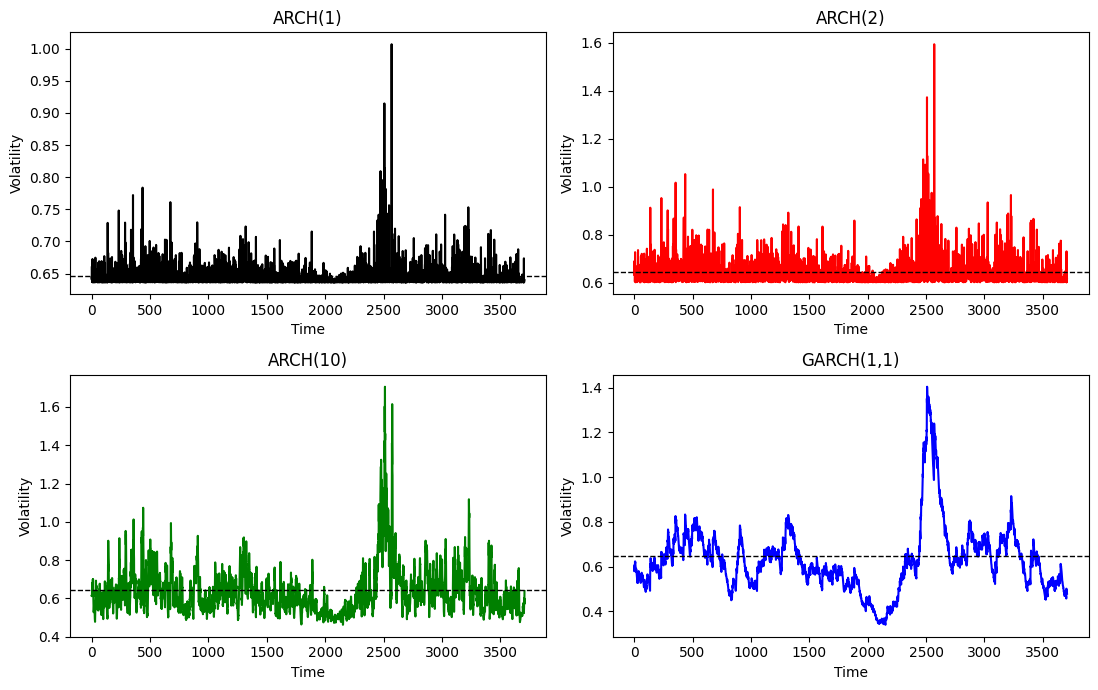

In [14]:
# Calculate the sample variance of the original data 'fx_USEU_log_returns'
sample_variance = np.var(fx_USEU_log_returns)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

# Plot ARCH(1) model
axes[0][0].plot(vol_estmat[:,0], color='black', label='ARCH(1)')
axes[0][0].axhline(y=np.sqrt(sample_variance), color='black', linestyle='dashed', linewidth=1)
axes[0][0].set_title('ARCH(1)')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Volatility')

# Plot ARCH(2) model
axes[0][1].plot(vol_estmat[:,1], color='red')
axes[0][1].axhline(y=np.sqrt(sample_variance), color='black', linestyle='dashed', linewidth=1)
axes[0][1].set_title('ARCH(2)')
axes[0][1].set_xlabel('Time')
axes[0][1].set_ylabel('Volatility')

# Plot ARCH(10) model
axes[1][0].plot(vol_estmat[:,2], color='green')
axes[1][0].axhline(y=np.sqrt(sample_variance), color='black', linestyle='dashed', linewidth=1)
axes[1][0].set_title('ARCH(10)')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Volatility')


# Plot GARCH(1, 1) model
axes[1][1].plot(vol_estmat[:,3], color='blue')
axes[1][1].axhline(y=np.sqrt(sample_variance), color='black', linestyle='dashed', linewidth=1)
axes[1][1].set_title('GARCH(1,1)')
axes[1][1].set_xlabel('Time')
axes[1][1].set_ylabel('Volatility')

plt.tight_layout()
plt.show()

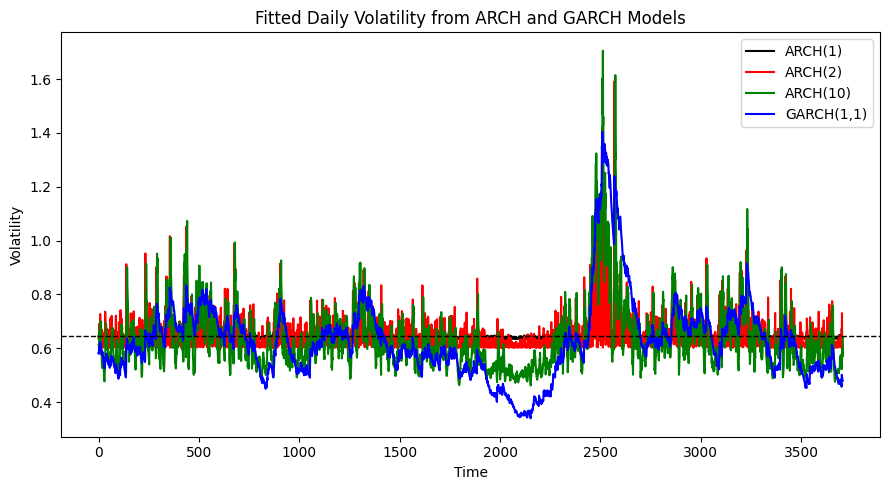

In [15]:
# Calculate the sample variance of the original data 'fx_USEU_log_returns'
sample_variance = np.var(fx_USEU_log_returns)

# Create the plot
plt.figure(figsize=(9,5))

# Plot all four models in one graph
plt.plot(vol_estmat[:,0], label='ARCH(1)', color='black')
plt.plot(vol_estmat[:,1], label='ARCH(2)', color='red')
plt.plot(vol_estmat[:,2], label='ARCH(10)', color='green')
plt.plot(vol_estmat[:,3], label='GARCH(1,1)', color='blue')

plt.axhline(y=np.sqrt(sample_variance), color='black', linestyle='dashed', linewidth=1)

plt.title('Fitted Daily Volatility from ARCH and GARCH Models')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()

<h3> Models Analysis</h3>

• The ARCH models have a hard lower bound which gets lower with higher order p values. </br>
• The GARCH(1,1) model provides an extremely parsimonious model compared to that of the ARCH(10) model. </br>
• The GARCH(1,1) model is quite smooth when compared to every ARCH model. </br>
• The GARCH(1, 1) model is very close to being non-stationary α1 + β1 = 0.980. This near-non stationarity is consistent with there being no long-term mean volatility. Instead, the volatility evolves slowly over time (i.e., with high value β1) with no tendency to revert toward any specific mean volatility level.